<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Processamento_Morfol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Gustavo Baron Lauritzen

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Exercício Avaliativo de Processamento Morfológico

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Processamento Morfológico
#### Obs: Utilize imagens em preto e branco.


### Erosão e Dilatação

1. Implemente a sua própria versão da erosão em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0905(a)(wirebond-mask)
2. Implemente a sua própria versão da dilatação em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0907(a)(text_gaps_1_and_2_pixels)
4. Relate as observações visíveis nas imagens de saída com os processamentos aplicados, descrevendo o comportamento visual em relação as bordas, junção, perda de informação e mlhoria na qualidade visual.
5. Aplique o seu algoritmo de detecção de borda (roberts ou sobel) a imagem ImagensMorfologia/Fig0905(a)(wirebond-mask) antes e depois de utilizar a dilatação/erosão e relate os resultados.

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255. O ruído pode ser intensificado ou excluído com processamento morfológico.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imagem original


Imagem com erosão


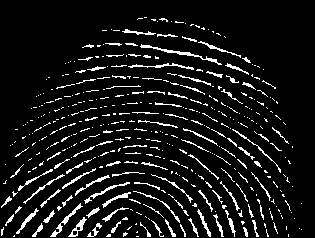

Imagem com dilatação


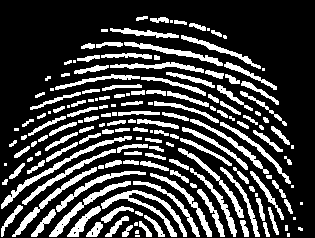

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def erode(image, struct_elem):
    """
    Aplica a erosão em uma imagem em tons de cinza.

    Parâmetros:
        - image: numpy array 2D (imagem em tons de cinza)
        - struct_elem: numpy array 2D (elemento estruturante)

    Retorna:
        - Imagem erodida (numpy array 2D)
    """
    # Dimensões da imagem e do elemento estruturante
    img_h, img_w = image.shape
    se_h, se_w = struct_elem.shape

    # Determina os deslocamentos (offsets) com base no elemento estruturante
    se_center_h = se_h // 2
    se_center_w = se_w // 2

    # Cria uma nova imagem para armazenar o resultado
    eroded_image = np.zeros_like(image)

    # Percorre cada pixel da imagem (exceto bordas)
    for i in range(se_center_h, img_h - se_center_h):
        for j in range(se_center_w, img_w - se_center_w):
            # Extrai a região da imagem onde o elemento estruturante será aplicado
            region = image[i - se_center_h:i + se_center_h + 1, j - se_center_w:j + se_center_w + 1]

            # Aplica a erosão, pegando o valor mínimo da região coberta pelo elemento estruturante
            eroded_image[i, j] = np.min(region[struct_elem == 1])

    return eroded_image

def dilate(image, struct_elem):
    """
    Aplica a dilatação em uma imagem em tons de cinza.

    Parâmetros:
        - image: numpy array 2D (imagem em tons de cinza)
        - struct_elem: numpy array 2D (elemento estruturante)

    Retorna:
        - Imagem dilatada (numpy array 2D)
    """
    # Dimensões da imagem e do elemento estruturante
    img_h, img_w = image.shape
    se_h, se_w = struct_elem.shape

    # Determina os deslocamentos (offsets) com base no elemento estruturante
    se_center_h = se_h // 2
    se_center_w = se_w // 2

    # Cria uma nova imagem para armazenar o resultado
    dilated_image = np.zeros_like(image)

    # Percorre cada pixel da imagem (exceto bordas)
    for i in range(se_center_h, img_h - se_center_h):
        for j in range(se_center_w, img_w - se_center_w):
            # Extrai a região da imagem onde o elemento estruturante será aplicado
            region = image[i - se_center_h:i + se_center_h + 1, j - se_center_w:j + se_center_w + 1]

            # Aplica a dilatação, pegando o valor máximo da região coberta pelo elemento estruturante
            dilated_image[i, j] = np.max(region[struct_elem == 1])

    return dilated_image


# Exemplo de uso:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/Fig0911(a)(noisy_fingerprint).tif', 0)

print("Imagem original")
cv2_imshow(image)

# Define um elemento estruturante quadrado 3x3
structuring_element = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])

# Aplica a erosão
eroded_img = erode(image, structuring_element)

print("Imagem com erosão")
cv2_imshow(eroded_img)

# Aplica a dilatação
dilated_img = dilate(eroded_img, structuring_element)

print("Imagem com dilatação")
cv2_imshow(dilated_img)

### Abertura e Fechamento

5. Implemente a sua versão do algoritmo de abertura em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
6. Implemente a sua versão do algoritmo de fechamento em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
7. Aplique o processamento indicado na image abaixo usando a figura ImagensMorfologia/Fig0911(a)(noisy_fingerprint)

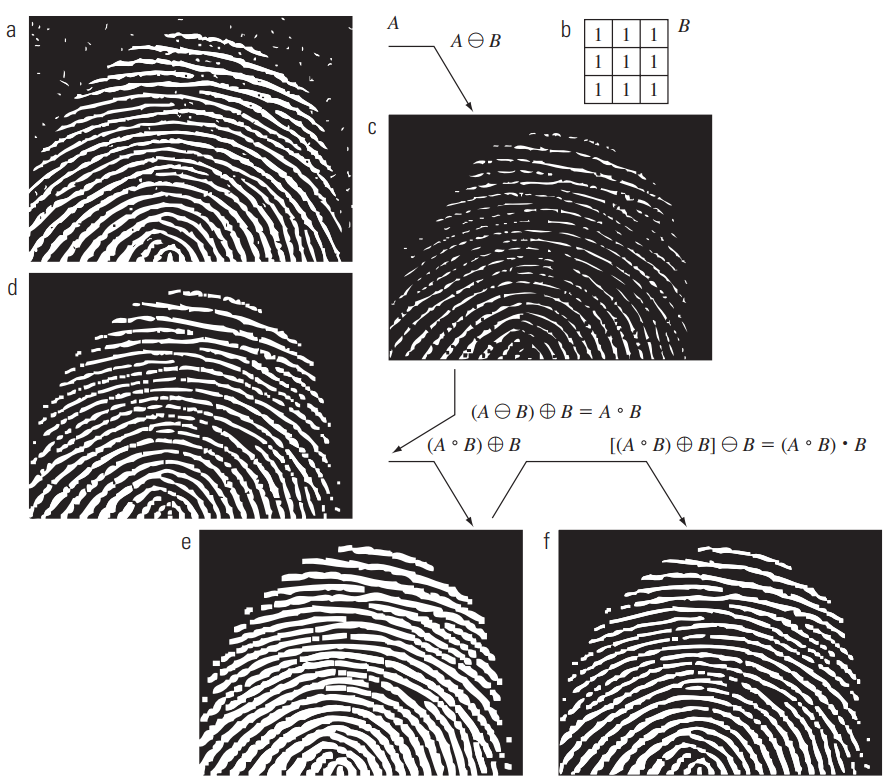